In [1]:
import json
import datasets

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("autodl-tmp/chatglm3-6b-128k", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("autodl-tmp/chatglm3-6b-128k", trust_remote_code=True)

len(tokenizer("hello")["input_ids"])

100%|██████████| 100/100 [03:35<00:00,  2.15s/it]


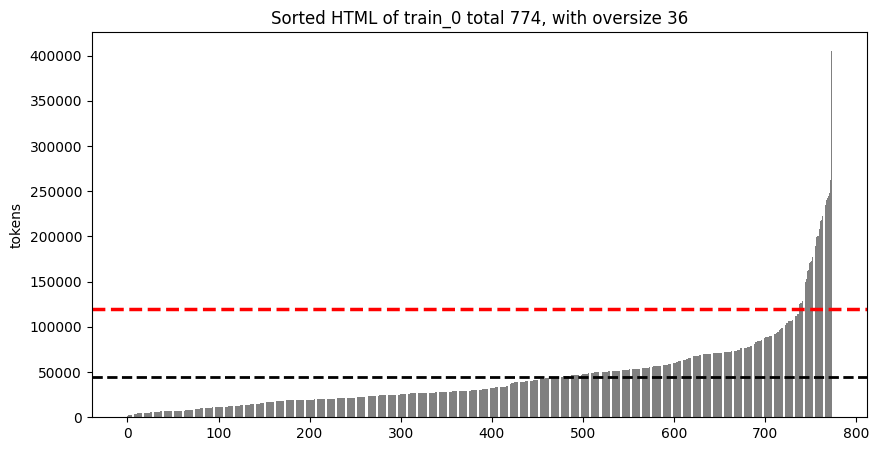

100%|██████████| 100/100 [03:35<00:00,  2.15s/it]


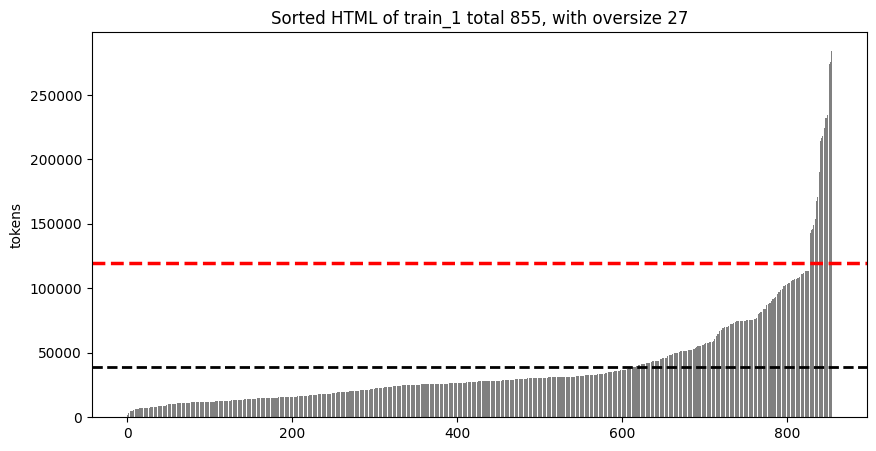

100%|██████████| 100/100 [03:22<00:00,  2.02s/it]


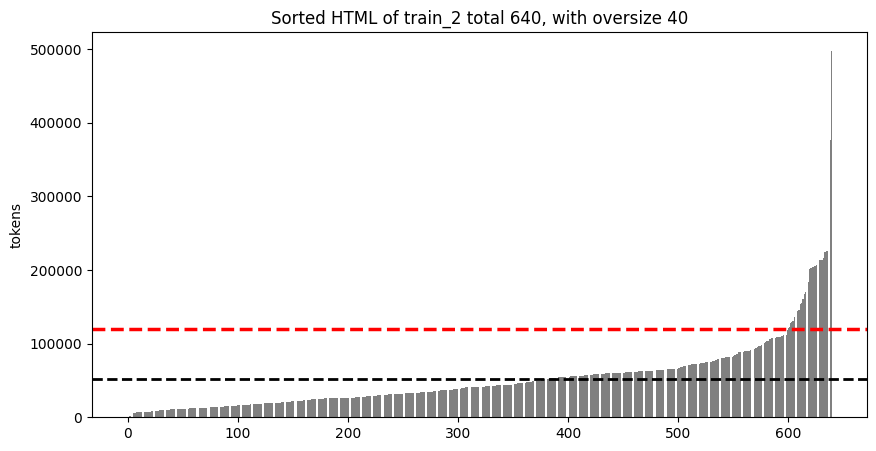

100%|██████████| 100/100 [03:42<00:00,  2.22s/it]


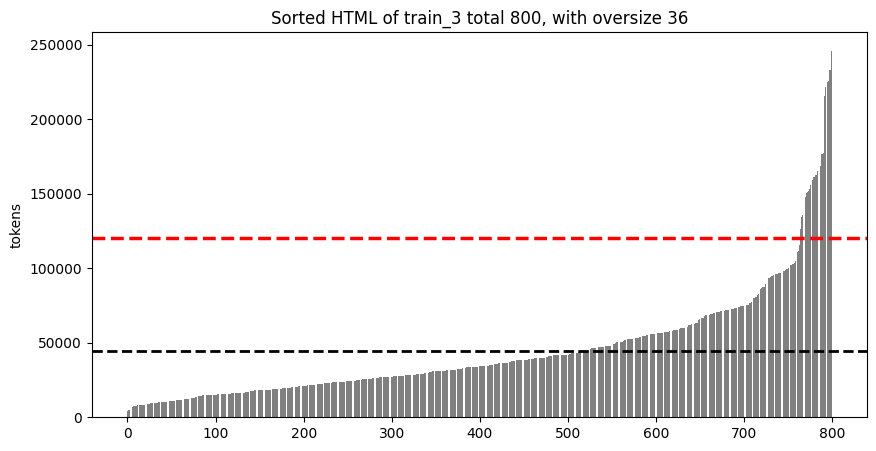

100%|██████████| 100/100 [03:37<00:00,  2.18s/it]


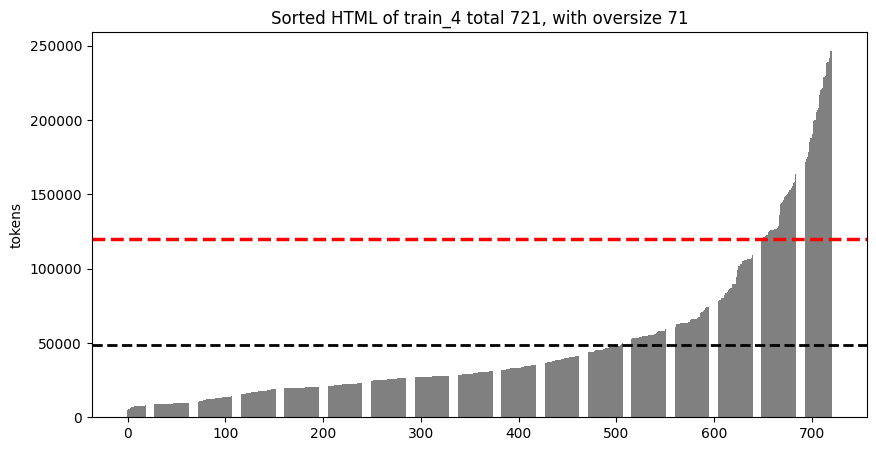

100%|██████████| 100/100 [03:35<00:00,  2.15s/it]


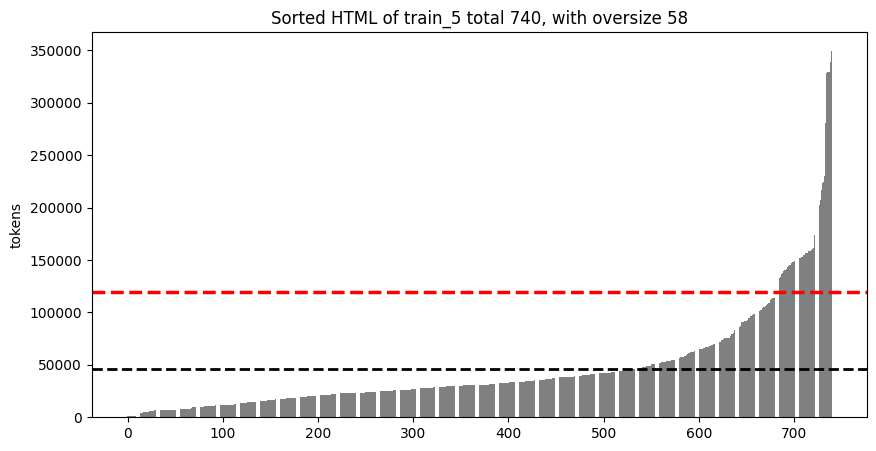

100%|██████████| 100/100 [03:14<00:00,  1.95s/it]


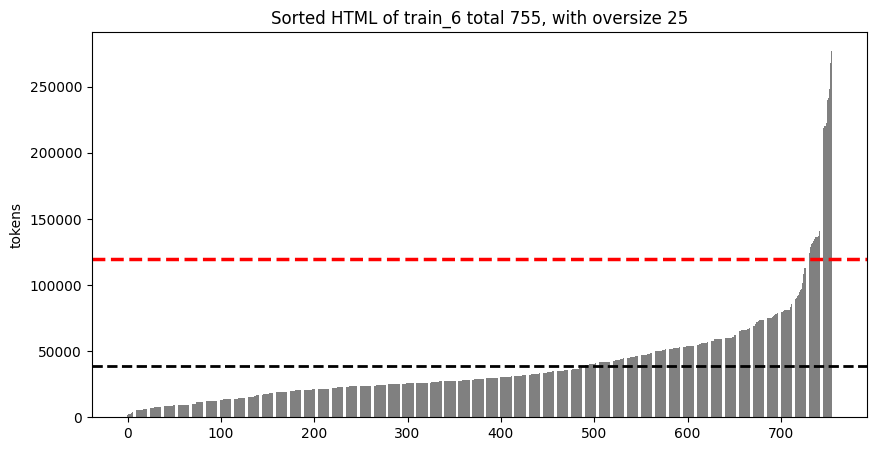

100%|██████████| 100/100 [03:28<00:00,  2.09s/it]


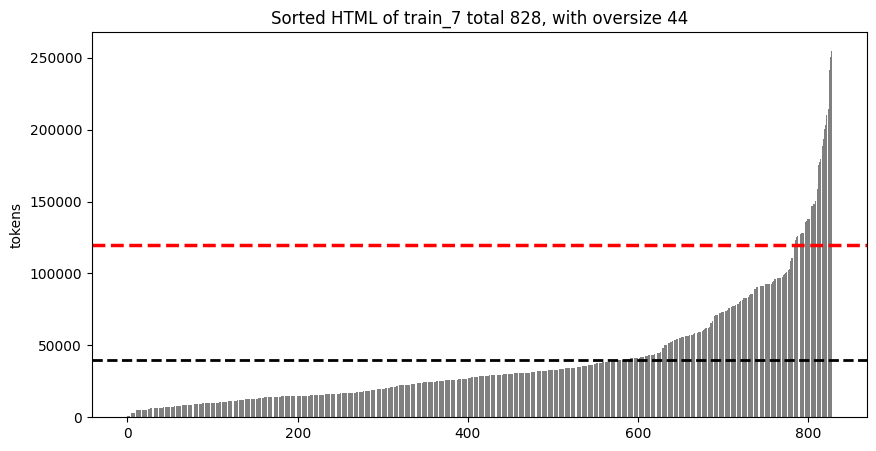

100%|██████████| 100/100 [03:10<00:00,  1.90s/it]


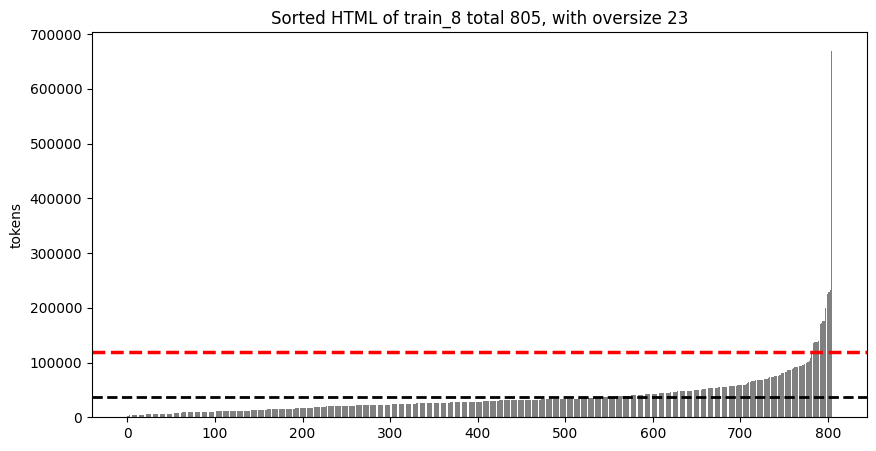

100%|██████████| 100/100 [03:37<00:00,  2.18s/it]


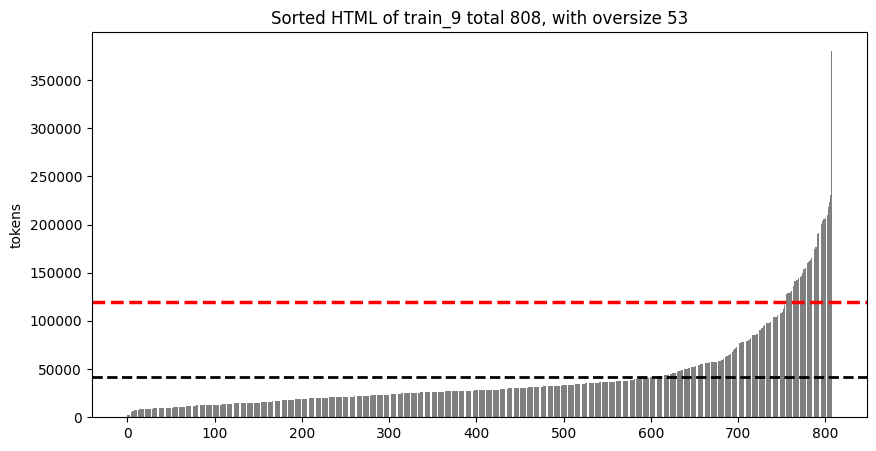

100%|██████████| 9/9 [00:09<00:00,  1.02s/it]


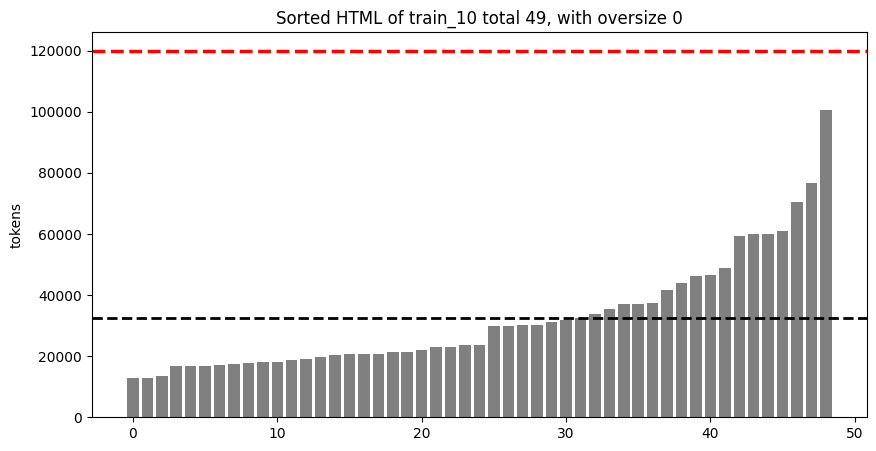

In [43]:
from tqdm import tqdm
import matplotlib.pyplot as plt

for ID in range(11):
    with open(f"autodl-tmp/train_dataset/train_{ID}.json") as file:
        data = json.load(file)

    len_seq = []
    oversize_seq = []
    
    for dat in tqdm(data):
        for d in dat["actions"]:
            test_cleaned_html = d["cleaned_html"].replace("backend_node_id", "id")
            token_num = len(tokenizer(test_cleaned_html)["input_ids"])
            len_seq.append(token_num)
            if token_num > 120000:
                oversize_seq.append(token_num)
    
    len_seq.sort()
    average_value = sum(len_seq) / len(len_seq)
    
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(len_seq)), len_seq, color='grey')
    plt.axhline(y=average_value, color='black', linestyle='--', linewidth=2, label=f'Average: {average_value:.2f}')
    plt.axhline(y=120000, color='red', linestyle='--', linewidth=2.5, label=f'Average: {average_value:.2f}')
    
    plt.title(f'Sorted HTML of train_{ID} total {len(len_seq)}, with oversize {len(oversize_seq)}')
    # plt.xlabel('')
    plt.ylabel('tokens')
    plt.savefig(f"tf-logs/train_{ID}_length.png")
    plt.show()

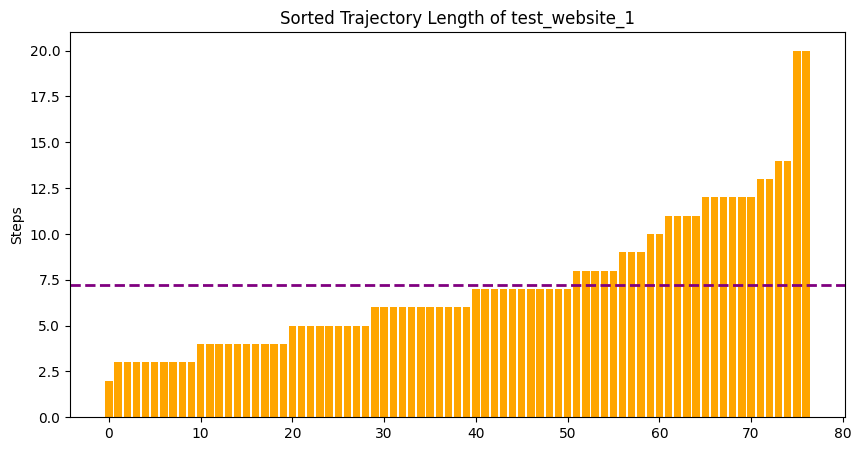

In [5]:
import matplotlib.pyplot as plt

num_list = [len(dat["actions"]) for dat in data]

average_value = sum(sorted(num_list)) / len(sorted(num_list))

plt.figure(figsize=(10, 5))
plt.bar(range(len(num_list)), sorted(num_list), color='orange')
plt.axhline(y=average_value, color='purple', linestyle='--', linewidth=2, label=f'Average: {average_value:.2f}')

plt.title(f'Sorted Trajectory Length of test_website_{ID}')
# plt.xlabel('')
plt.ylabel('Steps')
plt.savefig(f"tf-logs/test_website_{ID}_length.png")
plt.show()

In [6]:
for dat in data:
    print(dat["website"], "|", dat["subdomain"])

tiktok.music | Music
tiktok.music | Music
tiktok.music | Music
tiktok.music | Music
nba | Sports
nba | Sports
nba | Sports
nba | Sports
nba | Sports
nba | Sports
recreation.gov | Other
recreation.gov | Other
macys | Department
macys | Department
tripadvisor | Restaurant
tripadvisor | Restaurant
shopping.google | General
shopping.google | General
shopping.google | General
bestbuy | Digital
bestbuy | Digital
bestbuy | Digital
macys | Department
macys | Department
trip | General
tripadvisor | Restaurant
tripadvisor | Restaurant
tripadvisor | Restaurant
cars | Auto
cars | Auto
cars | Auto
tripadvisor | Restaurant
tripadvisor | Restaurant
tripadvisor | Restaurant
bestbuy | Digital
bestbuy | Digital
bestbuy | Digital
bestbuy | Digital
tripadvisor | Restaurant
tripadvisor | Restaurant
cars | Auto
macys | Department
nba | Sports
nba | Sports
shopping.google | General
shopping.google | General
shopping.google | General
stubhub | Event
stubhub | Event
stubhub | Event
tiktok.music | Music
tiktok.

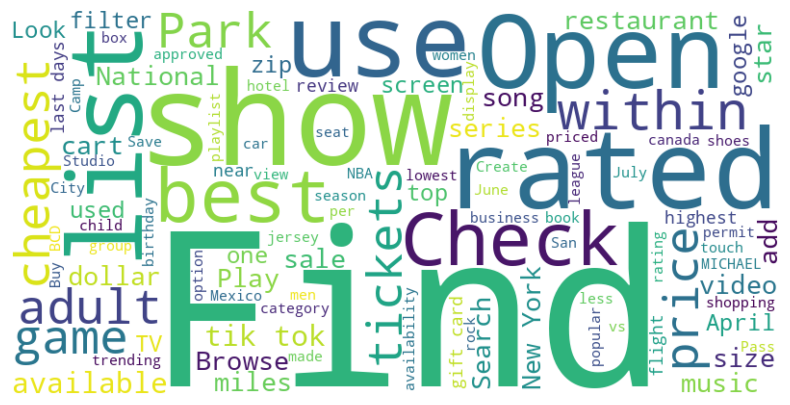

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

long_str_list = [dat["confirmed_task"] for dat in data]
combined_text = ' '.join(long_str_list)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

wordcloud.to_file(f'tf-logs/test_website_{ID}_wordcloud.png')
plt.show()

In [8]:
# operation_list = [d["operation"]["op"] for d in dat["actions"] for dat in data]  
# len(operation_list)

operation_list = []
for dat in data:
    for d in dat["actions"]:
        operation_list.append(d["operation"]["op"])

len(operation_list)

554

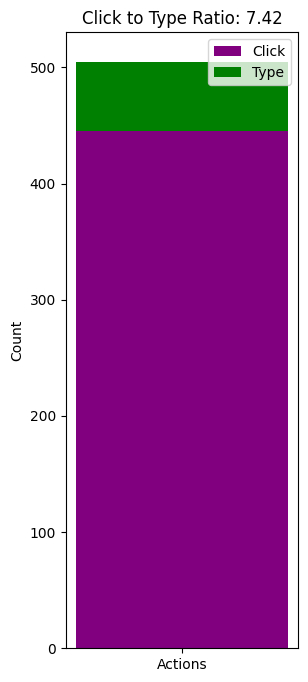

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

for ID in range(11):
    with open(f"autodl-tmp/train_dataset/train_{ID}.json") as file:
        data = json.load(file)

    operation_list = []
    for dat in data:
        for d in dat["actions"]:
            operation_list.append(d["operation"]["op"])
        
    counter = Counter(operation_list)
    click_count = counter.get("CLICK", 0)
    type_count = counter.get("TYPE", 0)
    select_count = counter.get("SELECT", 0)
    
    labels = ['Actions']
    click_segment = [click_count]
    type_segment = [type_count]
    select_segment = [select_count]
    
    plt.figure(figsize=(3, 8))
    plt.bar(labels, click_segment, width=0.1, color='purple', label='Click')
    plt.bar(labels, type_segment, width=0.1, bottom=click_segment, color='green', label='Type')
    plt.bar(labels, select_segment, width=0.1, color='orange', label='Select')
    
    plt.title(f"Click to Other Ratio: {click_count / (type_count+select_count):.2f}" if type_count+select_count != 0 else "Type count is zero")
    plt.ylabel("Count")
    plt.legend()
    plt.savefig(f"tf-logs/train_{ID}_rate.png")
    plt.show()

In [51]:
data[10]["actions"][4]["pos_candidates"][0]["backend_node_id"]

'24494'

In [52]:
import random
random.shuffle(data[10]["actions"][4]["neg_candidates"])
data[10]["actions"][4]["neg_candidates"][:3]

[{'tag': 'button',
  'attributes': '{"backend_node_id": "26737", "bounding_box_rect": "1226,2561.234375,24,24", "data_pw_testid_buckeye_candidate": "1"}',
  'backend_node_id': '26737'},
 {'tag': 'a',
  'attributes': '{"backend_node_id": "25659", "bounding_box_rect": "270,2940.234375,300,24", "class": "P_Ok-sublink-link", "is_clickable": "true", "data_pw_testid_buckeye_candidate": "1"}',
  'backend_node_id': '25659'},
 {'tag': 'li',
  'attributes': '{"backend_node_id": "25652", "bounding_box_rect": "270,2916.234375,300,24", "class": "P_Ok-sublink-item", "data_pw_testid_buckeye_candidate": "1"}',
  'backend_node_id': '25652'}]

In [40]:
data[10]["action_reprs"]

['[link]  Search for cars -> CLICK',
 '[textbox]  Pick-up location -> CLICK',
 '[textbox]  Pick-up location -> TYPE: Brooklyn',
 '[span]  Brooklyn, New York, United States -> CLICK',
 '[span]  Different drop-off -> CLICK',
 '[tab]  Same drop-off -> CLICK',
 '[button]  End date -> CLICK',
 '[button]  May 22, 2023 -> CLICK',
 '[svg]   -> CLICK',
 '[img]  SUV -> CLICK',
 '[div]  $75 -> CLICK',
 '[div]  View Deal -> HOVER']

In [53]:
data[10]["actions"][11]["operation"]["op"]

'CLICK'

In [ ]:
from openai import AzureOpenAI
import os

def num_tokens_from_string(input_text: str, client: AzureOpenAI) -> int:
    try:
        response = client.chat.completions.create(model="GPT4", 
            messages=[{"role": "user", "content": input_text}], 
            max_tokens=1
        )
        token_count = response.usage.prompt_tokens
        return token_count
        
    except Exception as e:
        token_count = int(len(input_text) / 4)
        return token_count

client = AzureOpenAI(azure_endpoint="https://gpt4jianfwa.openai.azure.com/", # os.getenv("AZURE_OPENAI_ENDPOINT"), 
            api_key="243d8896350a4724b0f5ccdaa66b0c47", # os.getenv("AZURE_OPENAI_KEY"),  
            api_version="2023-05-15"
        )
# 0.58 compression rates